# Build a model to predict whether a loan application will be approved

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('/content/loan_approval_dataset.csv')

In [3]:
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [6]:
data.drop(["loan_id"],axis=1).describe()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


# Handle missing values and encode categorical features

In [13]:
data=data.drop(["loan_id"],axis=1)

In [14]:
data.isna().sum()

,0
no_of_dependents,0
education,0
self_employed,0
income_annum,0
loan_amount,0
loan_term,0
cibil_score,0
residential_assets_value,0
commercial_assets_value,0
luxury_assets_value,0


In [9]:
numerical_data = data.select_dtypes(include=np.number)
display(numerical_data.var())

,0
loan_id,1.519052e+06
no_of_dependents,2.876111e+00
income_annum,7.878350e+12
loan_amount,8.178241e+13
loan_term,3.259482e+01
cibil_score,2.973224e+04
residential_assets_value,4.229729e+13
commercial_assets_value,1.926302e+13
luxury_assets_value,8.287833e+13
bank_asset_value,1.056370e+13


/tmp/ipython-input-2905367350.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical_data[col], kde=True)
/tmp/ipython-input-2905367350.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical_data[col], kde=True)
/tmp/ipython-input-2905367350.py:6: UserWarning: 

`distplot` is a dep

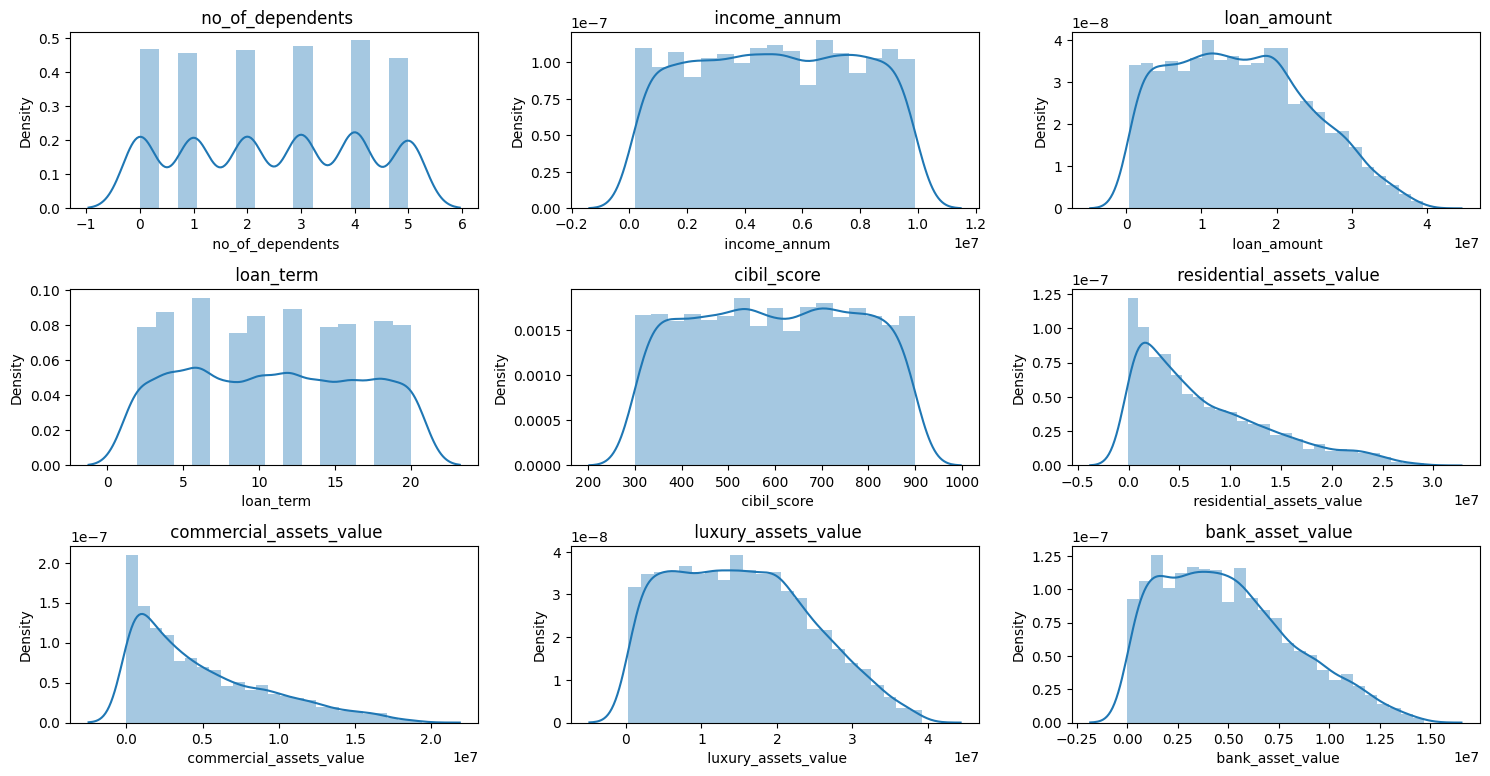

In [16]:
numerical_data = data.select_dtypes(include=np.number)

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_data.columns):
    plt.subplot(4, 3, i + 1)
    sns.distplot(numerical_data[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

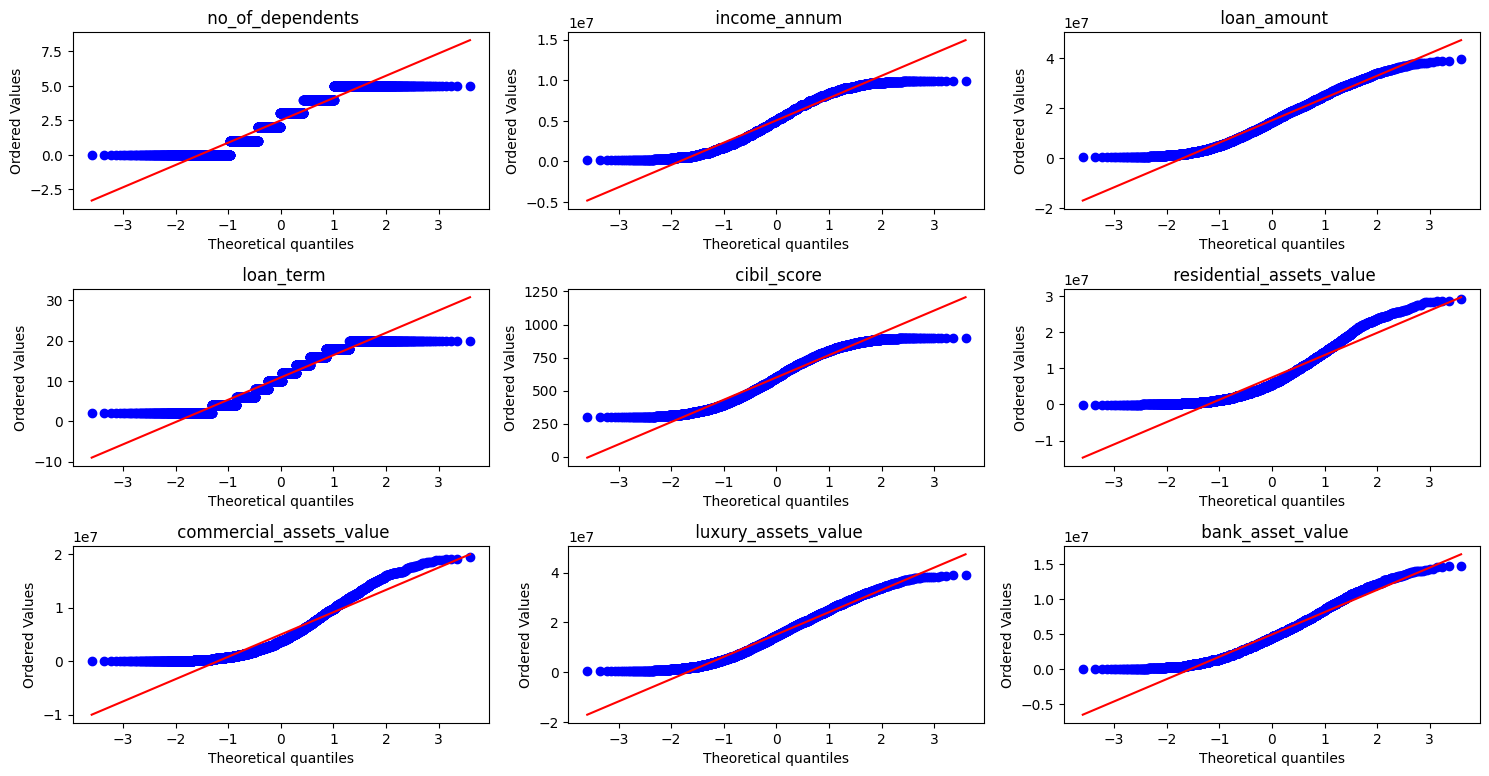

In [17]:
from scipy import stats

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_data.columns):
    plt.subplot(4, 3, i + 1)
    stats.probplot(numerical_data[col], dist="norm", plot=plt)
    plt.title(col)
plt.tight_layout()
plt.show()

In [18]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()

In [21]:
standard_scaler.fit(numerical_data)

StandardScaler()

In [25]:
data_transformed=standard_scaler.transform(numerical_data)

In [27]:
data_transformed=pd.DataFrame(data_transformed,columns=numerical_data.columns)

In [28]:
data_transformed

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,-0.294102,1.617979,1.633052,0.192617,1.032792,-0.780058,2.877289,0.832028,0.930304
1,-1.473548,-0.341750,-0.324414,-0.508091,-1.061051,-0.733924,-0.631921,-0.694993,-0.515936
2,0.295621,1.439822,1.610933,1.594031,-0.544840,-0.057300,-0.107818,1.996520,2.407316
3,0.295621,1.119139,1.721525,-0.508091,-0.771045,1.649637,-0.381263,0.897943,0.899533
4,1.475067,1.689242,1.002681,1.594031,-1.264055,0.757724,0.735304,1.568075,0.007172
...,...,...,...,...,...,...,...,...,...
4264,1.475067,-1.446324,-1.419268,0.192617,-1.641063,-0.718546,-1.019301,-1.299210,-1.285213
4265,-1.473548,-0.626801,-0.423946,1.594031,-0.237434,-0.503257,-0.472412,-0.453306,-0.946732
4266,-0.294102,0.513405,0.969504,1.243677,-0.829046,-0.964591,1.692361,0.326683,0.714907
4267,-0.883825,-0.341750,-0.258059,-0.508091,1.044393,0.111856,-0.973727,-0.112748,0.253341


In [29]:
data_transformed.var()

,0
no_of_dependents,1.000234
income_annum,1.000234
loan_amount,1.000234
loan_term,1.000234
cibil_score,1.000234
residential_assets_value,1.000234
commercial_assets_value,1.000234
luxury_assets_value,1.000234
bank_asset_value,1.000234


In [30]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

In [39]:
data[' loan_status'] = label_encoder.fit_transform(data[' loan_status'])
y=data[' loan_status']
y.head()

,loan_status
0,0
1,1
2,1
3,1
4,1


In [40]:
correlation_matrix = data_transformed.corrwith(y).sort_values(ascending=False)
display(correlation_matrix)

,0
loan_term,0.113036
no_of_dependents,0.018114
luxury_assets_value,0.015465
income_annum,0.015189
residential_assets_value,0.014367
bank_asset_value,0.006778
commercial_assets_value,-0.008246
loan_amount,-0.016150
cibil_score,-0.770518


<Axes: >

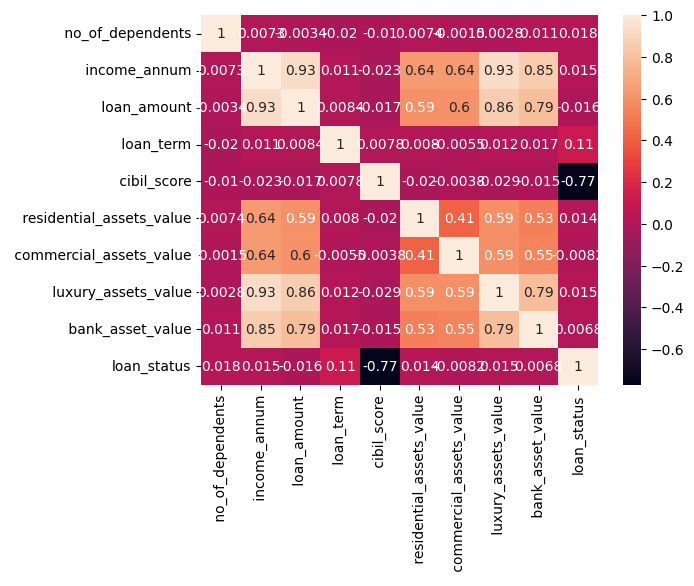

In [43]:
data_transformed['loan_status'] = y
correlation_matrix = data_transformed.corr()
sns.heatmap(correlation_matrix, annot=True)

In [57]:
X=data_transformed[[" cibil_score"]]

In [54]:
y.value_counts()

,count
loan_status,
0,2656
1,1613


In [59]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy='majority', random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

In [60]:
y_resampled.value_counts()

,count
loan_status,
0,1613
1,1613


In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [69]:
logistic_regression=LogisticRegression()

In [70]:
logistic_regression.fit(X_train,y_train)

LogisticRegression()

In [71]:
y_logistic_pred=logistic_regression.predict(X_test)

In [72]:
print(accuracy_score(y_test,y_logistic_pred))

0.9545454545454546


In [73]:
print(classification_report(y_test,y_logistic_pred))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95       486
           1       0.93      0.98      0.96       482

    accuracy                           0.95       968
   macro avg       0.96      0.95      0.95       968
weighted avg       0.96      0.95      0.95       968



<Axes: >

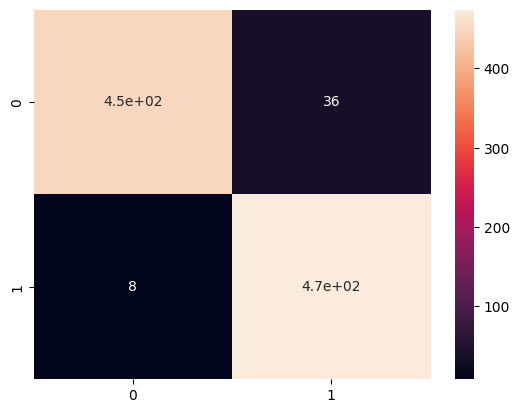

In [74]:
sns.heatmap(confusion_matrix(y_test,y_logistic_pred),annot=True)

In [75]:
from sklearn.tree import DecisionTreeClassifier

In [76]:
decision_tree=DecisionTreeClassifier()

In [77]:
decision_tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [78]:
y_tree_pred=decision_tree.predict(X_test)

In [79]:
print(accuracy_score(y_test,y_tree_pred))

0.9462809917355371


In [80]:
print(classification_report(y_test,y_tree_pred))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       486
           1       0.93      0.97      0.95       482

    accuracy                           0.95       968
   macro avg       0.95      0.95      0.95       968
weighted avg       0.95      0.95      0.95       968



<Axes: >

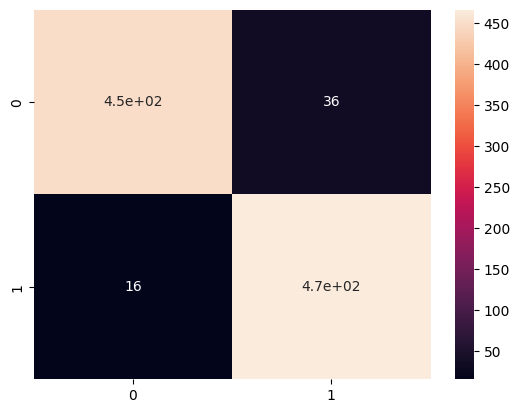

In [81]:
sns.heatmap(confusion_matrix(y_test,y_tree_pred),annot=True)